<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="Skills Network Logo">
    </a>
</p>

<h1 align="center"><font size="5">Final Project: House Sales in King County, USA </font></h1>


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
    <li><a href="#Instructions">Instructions</a></li>
    <li><a href="#About-the-Dataset">About the Dataset</a></li>
    <li><a href="#Module-1:-Importing-Data-Sets">Module 1: Importing Data </a></li>
    <li><a href="#Module-2:-Data-Wrangling">Module 2: Data Wrangling</a> </li>
    <li><a href="#Module-3:-Exploratory-Data-Analysis">Module 3: Exploratory Data Analysis</a></li>
    <li><a href="#Module-4:-Model-Development">Module 4: Model Development</a></li>
    <li><a href="#Module-5:-Model-Evaluation-and-Refinement">Module 5: Model Evaluation and Refinement</a></li>
</a></li>
</div>
<p>Estimated Time Needed: <strong>75 min</strong></p>
</div>

<hr>


# Instructions


In this assignment, you are a Data Analyst working at a Real Estate Investment Trust. The Trust would like to start investing in Residential real estate. You are tasked with determining the market price of a house given a set of features. You will analyze and predict housing prices using attributes or features such as square footage, number of bedrooms, number of floors, and so on. This is a template notebook; your job is to complete the ten questions. Some hints to the questions are given.

As you are completing this notebook, take and save the **screenshots** of the final outputs of your solutions (e.g., final charts, tables, calculation results etc.). They will need to be shared in the following Peer Review section of the Final Project module.


# About the Dataset

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015. It was taken from [here](https://www.kaggle.com/harlfoxem/housesalesprediction?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-wwwcourseraorg-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2022-01-01). It was also slightly modified for the purposes of this course. 


| Variable      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| id            | A notation for a house                                                                                      |
| date          | Date house was sold                                                                                         |
| price         | Price is prediction target                                                                                  |
| bedrooms      | Number of bedrooms                                                                                          |
| bathrooms     | Number of bathrooms                                                                                         |
| sqft_living   | Square footage of the home                                                                                  |
| sqft_lot      | Square footage of the lot                                                                                   |
| floors        | Total floors (levels) in house                                                                              |
| waterfront    | House which has a view to a waterfront                                                                      |
| view          | Has been viewed                                                                                             |
| condition     | How good the condition is overall                                                                           |
| grade         | overall grade given to the housing unit, based on King County grading system                                |
| sqft_above    | Square footage of house apart from basement                                                                 |
| sqft_basement | Square footage of the basement                                                                              |
| yr_built      | Built Year                                                                                                  |
| yr_renovated  | Year when house was renovated                                                                               |
| zipcode       | Zip code                                                                                                    |
| lat           | Latitude coordinate                                                                                         |
| long          | Longitude coordinate                                                                                        |
| sqft_living15 | Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area |
| sqft_lot15    | LotSize area in 2015(implies-- some renovations)                                                            |


## **Import the required libraries**


In [ ]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"

In [1]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [ ]:
#!pip install -U scikit-learn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

# Module 1: Importing Data Sets


Download the dataset by running the cell below.


In [ ]:
import piplite
await piplite.install('seaborn')

In [ ]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [ ]:
filepath='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'

In [ ]:
await download(filepath, "housing.csv")
file_name="housing.csv"

Load the csv:


In [ ]:
df = pd.read_csv(file_name)

> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface.While working on the downloaded version of this notebook on their local machines(Jupyter Anaconda), the learners can simply **skip the steps above,** and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


In [3]:
filepath='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
df = pd.read_csv(filepath, header=None)

We use the method <code>head</code> to display the first 5 columns of the dataframe.


In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,NaN,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,0.0,7129300520,20141013T000000,221900.0,3.0,1.0,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
2,1.0,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.721000000000004,-122.319,1690,7639
3,2.0,5631500400,20150225T000000,180000.0,2.0,1.0,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.23299999999999,2720,8062
4,3.0,2487200875,20141209T000000,604000.0,4.0,3.0,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.39299999999999,1360,5000


In [ ]:
# Dataframe has no headers
# Drop 1st column as it's just an index column
# Make 1st row the headers of df columns
# Drop 1st row

In [5]:
# Set the first row of the DataFrame as the header.
# iloc is used for integer-location based indexing for selection by position.
# df.iloc[0] selects the first row (index 0) of the DataFrame.
# df.columns = df.iloc[0] assigns the first row as the column names.
df.columns = df.iloc[0]
# Notice that first row still holds names of now-headers; needs to be dropped
df.head()

,NaN,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,NaN,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,0.0,7129300520,20141013T000000,221900.0,3.0,1.0,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
2,1.0,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.721000000000004,-122.319,1690,7639
3,2.0,5631500400,20150225T000000,180000.0,2.0,1.0,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.23299999999999,2720,8062
4,3.0,2487200875,20141209T000000,604000.0,4.0,3.0,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.39299999999999,1360,5000


In [6]:
# Drop the first row from the DataFrame as it has been set as the header.
# drop(0) removes the row with index 0.
# reset_index(drop=True) resets the index of the DataFrame and drops the old index.
df = df.drop(0).reset_index(drop=True)
df.head()

,NaN,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0.0,7129300520,20141013T000000,221900.0,3.0,1.0,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1.0,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.721000000000004,-122.319,1690,7639
2,2.0,5631500400,20150225T000000,180000.0,2.0,1.0,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.23299999999999,2720,8062
3,3.0,2487200875,20141209T000000,604000.0,4.0,3.0,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.39299999999999,1360,5000
4,4.0,1954400510,20150218T000000,510000.0,3.0,2.0,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
# Drop the first column
# We use the drop() method with the inplace=True parameter
# This modifies the original DataFrame directly without the need to create a new DataFrame
# df.columns[:1] gets the column labels of the first column
# axis=1 specifies that we are dropping columns (axis=0 would drop rows)
df.drop(df.columns[:1], axis=1, inplace=True)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.0,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.721000000000004,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2.0,1.0,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.23299999999999,2720,8062
3,2487200875,20141209T000000,604000.0,4.0,3.0,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.39299999999999,1360,5000
4,1954400510,20150218T000000,510000.0,3.0,2.0,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Question 1

Display the data types of each column using the function dtypes. Take a screenshot of your code and output. You will need to submit the screenshot for the final project. 


In [8]:
df.dtypes

0
id               object
date             object
price            object
bedrooms         object
bathrooms        object
sqft_living      object
sqft_lot         object
floors           object
waterfront       object
view             object
condition        object
grade            object
sqft_above       object
sqft_basement    object
yr_built         object
yr_renovated     object
zipcode          object
lat              object
long             object
sqft_living15    object
sqft_lot15       object
dtype: object

We use the method describe to obtain a statistical summary of the dataframe.


In [9]:
df.describe()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613,21613,21613,21600,21603,21613,21613,21613,21613,21613,...,21613,21613,21613,21613,21613,21613,21613,21613,21613,21613
unique,21436,372,4028,12,29,1038,9782,6,2,5,...,12,946,306,116,70,70,5034,752,777,8689
top,795000620,20140623T000000,350000.0,3.0,2.5,1300,5000,1.0,0,0,...,7,1300,0,2014,0,98103,47.6624,-122.29,1540,5000
freq,3,142,172,9824,5380,138,358,10680,21450,19489,...,8981,212,13126,559,20699,602,17,116,197,427


# Module 2: Data Wrangling


### Question 2

Drop the columns <code>"id"</code>  and <code>"Unnamed: 0"</code> from axis 1 using the method <code>drop()</code>, then use the method <code>describe()</code> to obtain a statistical summary of the data. Make sure the <code>inplace</code> parameter is set to <code>True</code>. Take a screenshot of your code and output. You will need to submit the screenshot for the final project. 


In [10]:
# Unnamed already dropped above
"""df.drop(df.columns[:1], axis=1, inplace=True)
df.head()"""
# Drop ID column
df.drop(df.columns[:1], axis=1, inplace=True)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3.0,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.721000000000004,-122.319,1690,7639
2,20150225T000000,180000.0,2.0,1.0,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.23299999999999,2720,8062
3,20141209T000000,604000.0,4.0,3.0,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.39299999999999,1360,5000
4,20150218T000000,510000.0,3.0,2.0,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


We can see we have missing values for the columns <code> bedrooms</code>  and <code> bathrooms </code>


In [11]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 13
number of NaN values for the column bathrooms : 10


We can replace the missing values of the column <code>'bedrooms'</code> with the mean of the column  <code>'bedrooms' </code> using the method <code>replace()</code>. Don't forget to set the <code>inplace</code> parameter to <code>True</code>


In [17]:
# Change bedroom first to type float for calculation
mean=np.round((df['bedrooms'].astype(float)).mean(),2)
df['bedrooms'].replace(np.nan,mean, inplace=True)
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0


In [22]:
# Check the mean and sample of rows
print(mean)
# print(df.head(15))
print(df.tail(15))

3.37
0                 date      price bedrooms bathrooms sqft_living sqft_lot  \
21598  20141013T000000   541800.0      4.0       2.5        3118     7866   
21599  20140915T000000   810000.0      4.0       3.0        3990     7838   
21600  20141015T000000  1537000.0      5.0      3.75        4470     8088   
21601  20150407T000000   467000.0      3.0       2.5        1425     1179   
21602  20140626T000000   224000.0      3.0      1.75        1500    11968   
21603  20140825T000000   507250.0      3.0       2.5        2270     5536   
21604  20150126T000000   429000.0      3.0       2.0        1490     1126   
21605  20141014T000000   610685.0      4.0       2.5        2520     6023   
21606  20150326T000000  1007500.0      4.0       3.5        3510     7200   
21607  20150219T000000   475000.0      3.0       2.5        1310     1294   
21608  20140521T000000   360000.0      3.0       2.5        1530     1131   
21609  20150223T000000   400000.0      4.0       2.5        2310     58

In [24]:
# Checking if blanks on excel are now replaced with mean of column
# Define the list of Excel cell references (without the "A" prefix)
# The cells are given as strings and start from the second row (index 2 in Excel)
excel_cells = ['877', '3121', '3469', '4870', '6996', '8479', '8486', '9775', '9856', '12655', '14425', '18381', '19454']

# Convert Excel cell references to DataFrame row indices
# Convert each cell reference to an integer and subtract 2 to adjust for Excel's indexing (2-based) to DataFrame's indexing (0-based)
row_indices = [int(cell) - 2 for cell in excel_cells]

# Loop through the row indices and print each corresponding row in the DataFrame on a new line
# Use .iloc[] to select rows by index and print each row separately
for idx in row_indices:
    print(df["bedrooms"].iloc[idx])
    print("\n")  # Print a new line for better readability

3.37


3.37


3.37


3.37


3.37


3.37


3.37


3.37


3.37


3.37


3.37


3.37


3.37




In [25]:
# Round of rows that has mean of bedrooms to nearest whole number as all other numbers in column are whole
for idx in row_indices:
    df["bedrooms"].iloc[idx] = np.round(df["bedrooms"].iloc[idx],0)
    print(df["bedrooms"].iloc[idx])
    print("\n")  # Print a new line for better readability    

3.0


3.0


3.0


3.0


3.0


3.0


3.0


3.0


3.0


3.0


3.0


3.0


3.0




We also replace the missing values of the column <code>'bathrooms'</code> with the mean of the column  <code>'bathrooms' </code> using the method <code>replace()</code>. Don't forget to set the <code> inplace </code>  parameter top <code> True </code>


In [26]:
# Find the indices of NaN values in the 'bathrooms' column

# df["bathrooms"].isna() creates a boolean Series where True indicates the presence of a NaN value in the 'bathrooms' column
# df[df["bathrooms"].isna()] filters the DataFrame to only include rows where the 'bathrooms' column has NaN values
# .index extracts the index (row labels) of these filtered rows
nan_indices = df[df["bathrooms"].isna()].index

# Print the indices of rows with NaN values in the 'bathrooms' column
print(nan_indices)

Index([875, 1149, 3119, 5832, 6994, 9773, 9854, 10481, 14423, 19452], dtype='int64')


In [29]:
mean_bathrooms =np.round((df['bathrooms'].astype(float)).mean(), 2)
df['bathrooms'].replace(np.nan,mean_bathrooms, inplace=True)

In [28]:
for idx in row_indices:
    print(df["bathrooms"].iloc[nan_indices])
    print("\n")  # Print a new line for better readability  

875      3.37
1149     3.37
3119     3.37
5832     3.37
6994     3.37
9773     3.37
9854     3.37
10481    3.37
14423    3.37
19452    3.37
Name: bathrooms, dtype: object


875      3.37
1149     3.37
3119     3.37
5832     3.37
6994     3.37
9773     3.37
9854     3.37
10481    3.37
14423    3.37
19452    3.37
Name: bathrooms, dtype: object


875      3.37
1149     3.37
3119     3.37
5832     3.37
6994     3.37
9773     3.37
9854     3.37
10481    3.37
14423    3.37
19452    3.37
Name: bathrooms, dtype: object


875      3.37
1149     3.37
3119     3.37
5832     3.37
6994     3.37
9773     3.37
9854     3.37
10481    3.37
14423    3.37
19452    3.37
Name: bathrooms, dtype: object


875      3.37
1149     3.37
3119     3.37
5832     3.37
6994     3.37
9773     3.37
9854     3.37
10481    3.37
14423    3.37
19452    3.37
Name: bathrooms, dtype: object


875      3.37
1149     3.37
3119     3.37
5832     3.37
6994     3.37
9773     3.37
9854     3.37
10481    3.37
14423    3.37
19452    

In [30]:
# Fix previous issue: I put bedroom mean for NAN bathroom attributes
for idx in row_indices:
    df["bathrooms"] = mean_bathrooms
    print(df["bathrooms"].iloc[nan_indices])
    print("\n")  # Print a new line for better readability  

875      2.12
1149     2.12
3119     2.12
5832     2.12
6994     2.12
9773     2.12
9854     2.12
10481    2.12
14423    2.12
19452    2.12
Name: bathrooms, dtype: float64


875      2.12
1149     2.12
3119     2.12
5832     2.12
6994     2.12
9773     2.12
9854     2.12
10481    2.12
14423    2.12
19452    2.12
Name: bathrooms, dtype: float64


875      2.12
1149     2.12
3119     2.12
5832     2.12
6994     2.12
9773     2.12
9854     2.12
10481    2.12
14423    2.12
19452    2.12
Name: bathrooms, dtype: float64


875      2.12
1149     2.12
3119     2.12
5832     2.12
6994     2.12
9773     2.12
9854     2.12
10481    2.12
14423    2.12
19452    2.12
Name: bathrooms, dtype: float64


875      2.12
1149     2.12
3119     2.12
5832     2.12
6994     2.12
9773     2.12
9854     2.12
10481    2.12
14423    2.12
19452    2.12
Name: bathrooms, dtype: float64


875      2.12
1149     2.12
3119     2.12
5832     2.12
6994     2.12
9773     2.12
9854     2.12
10481    2.12
14423    2.12
1945

In [31]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


# Module 3: Exploratory Data Analysis


### Question 3

Use the method <code>value_counts</code> to count the number of houses with unique floor values, use the method <code>.to_frame()</code> to convert it to a data frame. Take a screenshot of your code and output. You will need to submit the screenshot for the final project. 


In [34]:
floors_df = df["floors"].value_counts().to_frame()
floors_df

,count
floors,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


### Question 4

Use the function <code>boxplot</code> in the seaborn library  to  determine whether houses with a waterfront view or without a waterfront view have more price outliers. Take a screenshot of your code and boxplot. You will need to submit the screenshot for the final project. 


In [35]:
# Create a boxplot to compare prices between waterfront and no waterfront
# sns.boxplot() creates a boxplot
# x="waterfront" specifies the waterfront status as the categorical variable (x-axis)
# y="price" specifies the price as the quantitative variable (y-axis)
# data=df specifies the DataFrame containing the data
sns.boxplot(x="waterfront", y="price", data=df)

TypeError: Neither the `x` nor `y` variable appears to be numeric.

In [36]:
# Check dtypes
df.dtypes

0
date              object
price             object
bedrooms          object
bathrooms        float64
sqft_living       object
sqft_lot          object
floors            object
waterfront        object
view              object
condition         object
grade             object
sqft_above        object
sqft_basement     object
yr_built          object
yr_renovated      object
zipcode           object
lat               object
long              object
sqft_living15     object
sqft_lot15        object
dtype: object

<Axes: xlabel='waterfront', ylabel='price'>

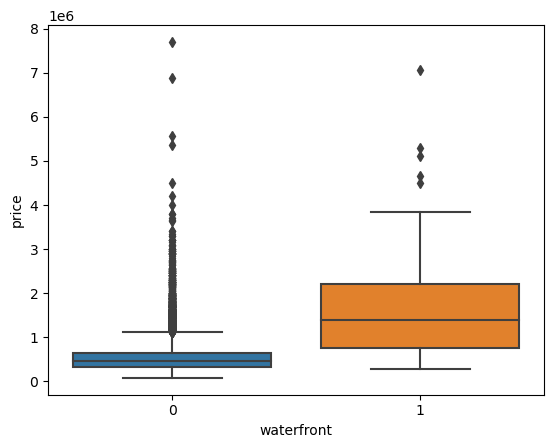

In [38]:
# pass waterfront and price as numbers
sns.boxplot(x=df["waterfront"].astype(int), y=df["price"].astype(float), data=df)

### Question 5

Use the function <code>regplot</code>  in the seaborn library  to  determine if the feature <code>sqft_above</code> is negatively or positively correlated with price. Take a screenshot of your code and scatterplot. You will need to submit the screenshot for the final project. 


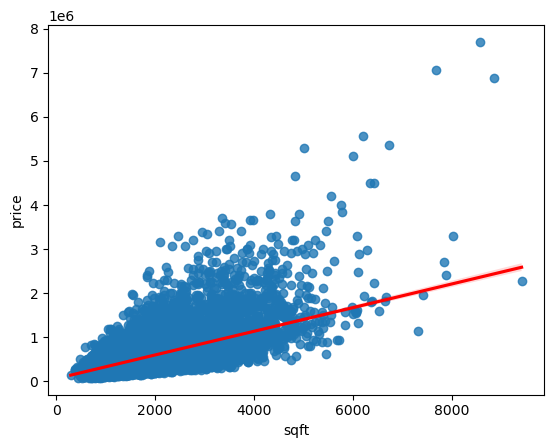

In [43]:
# Convert both columns to float before plotting and place in temp df_copy
# Create a temporary DataFrame df_copy to avoid modifying the original DataFrame
df_copy = pd.DataFrame()
df_copy["sqft"] = df["sqft_above"].astype(float)
df_copy["price"] = df["price"].astype(float)

# Create a regression plot to visualize the correlation between the two columns
# sns.regplot() creates a scatter plot with a regression line
# x=column1 specifies the independent variable (x-axis)
# y=column2 specifies the dependent variable (y-axis)
# data=df specifies the DataFrame containing the data
sns.regplot(x="sqft", y="price", data=df_copy, line_kws={"color": "red"})

# Display the plot
plt.show()

We can use the Pandas method <code>corr()</code>  to find the feature other than price that is most correlated with price.


In [44]:
df.corr()['price'].sort_values()

ValueError: could not convert string to float: '20141013T000000'

In [51]:
# Create a copy of the dataframe excluding the 'date' column for conversion to float
df_numeric = df[[
    "price", "bedrooms", "bathrooms", "sqft_living", "sqft_lot", 
    "floors", "waterfront", "view", "condition", "grade", "sqft_above", 
    "sqft_basement", "yr_built", "yr_renovated", "zipcode", "lat", 
    "long", "sqft_living15", "sqft_lot15"
]].astype(float)

# Optionally, convert 'date' column to datetime if needed
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Display the head of the numeric DataFrame
print(df_numeric.head())

0     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0       3.0       2.12       1180.0    5650.0     1.0         0.0   
1  538000.0       3.0       2.12       2570.0    7242.0     2.0         0.0   
2  180000.0       2.0       2.12        770.0   10000.0     1.0         0.0   
3  604000.0       4.0       2.12       1960.0    5000.0     1.0         0.0   
4  510000.0       3.0       2.12       1680.0    8080.0     1.0         0.0   

0  view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0   0.0        3.0    7.0      1180.0            0.0    1955.0           0.0   
1   0.0        3.0    7.0      2170.0          400.0    1951.0        1991.0   
2   0.0        3.0    6.0       770.0            0.0    1933.0           0.0   
3   0.0        5.0    7.0      1050.0          910.0    1965.0           0.0   
4   0.0        3.0    8.0      1680.0            0.0    1987.0           0.0   

0  zipcode      lat     long  sqft_living15 

In [52]:
df.corr()['price'].sort_values()

0
zipcode         -0.053203
date            -0.004357
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308868
sqft_basement    0.323816
view             0.397293
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
bathrooms             NaN
Name: price, dtype: float64

# Module 4: Model Development


We can Fit a linear regression model using the  longitude feature <code>'long'</code> and  caculate the R^2.


In [50]:
X = df[['long']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.00046769430149007363

### Question  6

Fit a linear regression model to predict the <code>'price'</code> using the feature <code>'sqft_living'</code> then calculate the R^2. Take a screenshot of your code and the value of the R^2. You will need to submit it for the final project.


In [53]:
X = df[['sqft_living']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.4928532179037931

### Question 7

Fit a linear regression model to predict the <code>'price'</code> using the list of features:


In [55]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]     

Then calculate the R^2. Take a screenshot of your code and the value of the R^2. You will need to submit it for the final project.


In [57]:
features_df = df[["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]]
lm.fit(features_df, Y)
lm.score(features_df, Y)

0.6576850352670247

In [60]:
# Importing the pandas library for data manipulation and analysis
import pandas as pd

# Importing the matplotlib library for creating static, animated, and interactive visualizations
import matplotlib.pyplot as plt

# Importing the numpy library for numerical operations and array handling
import numpy as np

# Importing the seaborn library for statistical data visualization, built on top of matplotlib
import seaborn as sns

# Importing Pipeline from scikit-learn to create a pipeline of transforms with a final estimator
from sklearn.pipeline import Pipeline

# Importing StandardScaler from scikit-learn to standardize features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler

# Importing PolynomialFeatures from scikit-learn to generate polynomial and interaction features
from sklearn.preprocessing import PolynomialFeatures

# Importing LinearRegression from scikit-learn to perform linear regression
from sklearn.linear_model import LinearRegression

# Importing Ridge from scikit-learn to perform ridge regression, a type of linear regression with L2 regularization
from sklearn.linear_model import Ridge

# Importing mean_squared_error from scikit-learn to calculate the mean squared error regression loss
from sklearn.metrics import mean_squared_error

# Importing r2_score from scikit-learn to calculate the R^2 (coefficient of determination) regression score function
from sklearn.metrics import r2_score

# Importing cross_val_score from scikit-learn to evaluate a score by cross-validation
from sklearn.model_selection import cross_val_score

# Importing train_test_split from scikit-learn to split arrays or matrices into random train and test subsets
from sklearn.model_selection import train_test_split

### This will help with Question 8

Create a list of tuples, the first element in the tuple contains the name of the estimator:

<code>'scale'</code>

<code>'polynomial'</code>

<code>'model'</code>

The second element in the tuple  contains the model constructor

<code>StandardScaler()</code>

<code>PolynomialFeatures(include_bias=False)</code>

<code>LinearRegression()</code>


In [58]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

### Question 8

Use the list to create a pipeline object to predict the 'price', fit the object using the features in the list <code>features</code>, and calculate the R^2. Take a screenshot of your code and the value of the R^2. You will need to submit it for the final project.


In [61]:
# Create the pipeline with the specified components
pipe = Pipeline(Input)

features_df = features_df.astype(float)

pipe.fit(features_df, Y)

ypipe = pipe.predict(features_df)

print(r2_score(Y, ypipe))

0.7486111193982805


# Module 5: Model Evaluation and Refinement


Import the necessary modules:


In [62]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
print("done")

done


We will split the data into training and testing sets:


In [63]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3242
number of training samples: 18371


### Question 9

Create and fit a Ridge regression object using the training data, set the regularization parameter to 0.1, and calculate the R^2 using the test data. Take a screenshot of your code and the value of the R^2. You will need to submit it for the final project.


In [64]:
from sklearn.linear_model import Ridge

In [66]:
RidgeModel = Ridge(alpha=0.1)

RidgeModel.fit(x_train, y_train)

yhat = RidgeModel.predict(x_test)

print(r2_score(y_test, yhat))

0.6478468636082789


### Question 10

Perform a second order polynomial transform on both the training data and testing data. Create and fit a Ridge regression object using the training data, set the regularisation parameter to 0.1, and calculate the R^2 utilising the test data provided. Take a screenshot of your code and the R^2. You will need to submit it for the final project.


In [67]:
pr = PolynomialFeatures(degree=2)

x_train_pr = pr.fit_transform(x_train)

x_test_pr = pr.fit_transform(x_test)

RidgeModel.fit(x_train_pr, y_train)

y_hat = RidgeModel.predict(x_test_pr)

print(r2_score(y_test, y_hat))

0.6918398570345539


<p>Once you complete your notebook you will have to share it. You can download the notebook by navigating to "File" and clicking on "Download" button.
        <p><img width="600" src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Module%206/images/DA0101EN_FA_Image21.png" alt="share notebook" style="display: block; margin-left: auto; margin-right: auto;"></p>
        <p></p>
<p>This will save the (.ipynb) file on your computer. Once saved, you can upload this file in the "My Submission" tab, of the "Peer-graded Assignment" section.  
          


<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2022-01-01">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


Other contributors: <a href="https://www.linkedin.com/in/michelleccarey/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2022-01-01">Michelle Carey</a>, <a href="https://www.linkedin.com/in/jiahui-mavis-zhou-a4537814a?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2022-01-01">Mavis Zhou</a>


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By      | Change Description                           |
| ----------------- | ------- | --------------- | -------------------------------------------- |
| 2020-12-01        | 2.2     | Aije Egwaikhide | Coverted Data describtion from text to table |
| 2020-10-06        | 2.1     | Lakshmi Holla   | Changed markdown instruction of Question1    |
| 2020-08-27        | 2.0     | Malika Singla   | Added lab to GitLab                          |
| 2022-06-13        | 2.3     | Svitlana Kramar | Updated Notebook sharing instructions        |
| <hr>              |         |                 |                                              |

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
